# Demo Showing Building Neural Networks from Scratch

- This is a demo to show the functionality of the neural network modules that I have build from scratch.
- The source code exists inside the models folder.

In [1]:
# Importing the necessary modules needed for the demo.
from models import neural_network as nn
from models import model as md
import utils as ut
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Defining some global variables
samples = 1000
seed = 42
batch_size = 32
epochs = 30000
learning_rate = 0.01

Here we will be using the utils file that contains a class that generates points that forms the shape of a sine wave.

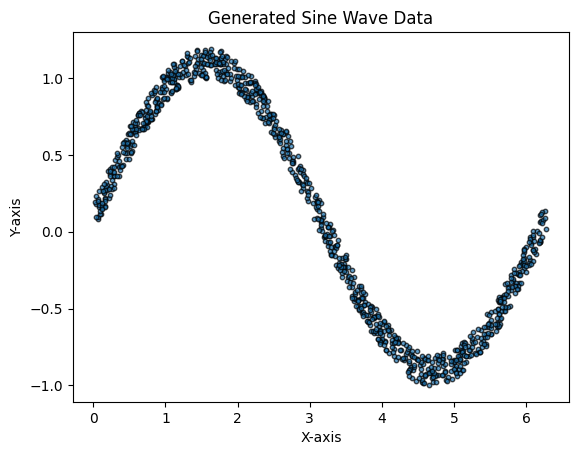

In [3]:
# Create DataSet
sin_wave = ut.SinData(samples, seed, batch_size)
x_values, y_values = sin_wave.x_values.reshape(-1, 1), sin_wave.y_values.reshape(-1, 1)
colors = np.random.rand(1000)

# Plot the points expressing sine wave data.
plt.title('Generated Sine Wave Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.scatter(sin_wave.x_values,
            sin_wave.y_values,
            s=10,
            alpha=0.7,
            edgecolors='k')
plt.show()

The model class interfaces with the neural network module that has basic neural network functionalities.

In [4]:
# Defining model parametres
learning_rate = 0.01
epochs = 30000

# Create the model
model = md.Model()

# Add layers to the model
model.add(nn.DenseLayer(1, 16))
model.add(nn.ActivationReLU())
model.add(nn.DenseLayer(16, 16))
model.add(nn.ActivationReLU())
model.add(nn.DenseLayer(16, 1))
model.add(nn.ActivationLinear())

# Compile the model
# Defining the loss function and the optimizer that will be used in the learning process.
model.compile(loss=nn.LossMeanSquareError(), optimizer=nn.Optimizer_SGD(learning_rate=learning_rate))

In [5]:
# Train the model using the fit function.
model.fit(x_values, y_values, epochs=epochs) 

Epoch: 0, Loss: 0.5154123270848169
Epoch: 10000, Loss: 0.025419126253227134
Epoch: 20000, Loss: 0.007441744922024647
Neural Network Training has been completed


In [6]:
# Get basic information about the model architecture and parameters.
model.info()

Model Information:
Number of layers: 6

Layer 1:
  Type: DenseLayer
  Number of neurons: 16
  Weights shape: (1, 16)
  Biases shape: (1, 16)
  Weights: [[ 0.49429014  0.31302792 -0.08135437 -0.19355847 -0.06642243  0.6707261
  -0.04285    -0.08204681  0.2520694   0.06300869 -0.13883902 -0.02172837
  -0.04972676 -0.06409044 -0.10170367  0.54935944]]
  Biases: [[-0.47865707 -0.4003164   0.          0.          0.          0.2506421
   0.          0.         -0.6477465  -0.32350957  0.          0.
   0.          0.          0.         -1.0569438 ]]

Layer 2:
  Type: ActivationReLU

Layer 3:
  Type: DenseLayer
  Number of neurons: 16
  Weights shape: (16, 16)
  Biases shape: (1, 16)
  Weights: [[-7.84353241e-02 -1.99494526e-01  3.23191918e-02  2.06909508e-01
  -9.99955460e-02 -5.64747453e-02 -2.46251345e-01 -4.67413813e-01
   1.10685013e-01 -1.14059178e-02  5.55702113e-02 -9.68831703e-02
  -3.28444988e-01  2.03701600e-01 -8.05605426e-02 -1.71203524e-01]
 [-7.33061433e-02 -3.21662538e-02  2

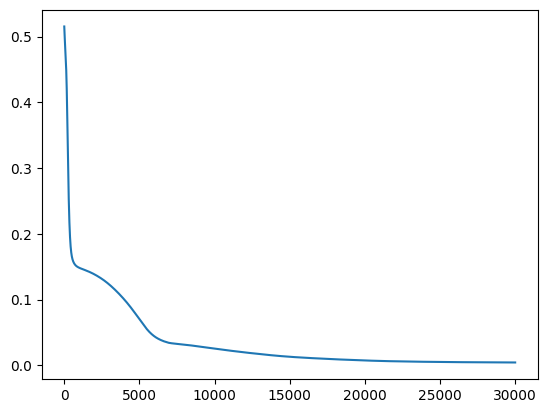

In [7]:
# Plot the history of the evolution of the loss values by each iteration
plt.plot(model.loss_history)

forward pass called:
output: [[-0.22947379 -0.24251166 -0.04101265 ... -0.0323095  -0.05127121
  -0.77999877]
 [ 2.46831247  1.46596347 -0.48503669 ... -0.38210871 -0.60635966
   2.21835021]
 [ 2.44019513  1.4481571  -0.48040891 ... -0.37846297 -0.60057433
   2.1871003 ]
 ...
 [ 0.05954597 -0.05947897 -0.08858192 ... -0.06978425 -0.11073905
  -0.45877906]
 [ 2.53360803  1.50731435 -0.49578358 ... -0.39057503 -0.61979468
   2.29092041]
 [ 2.22299448  1.31060658 -0.44466022 ... -0.35030039 -0.55588377
   1.94570113]]
forward pass called:
output: [[0.         0.         0.         ... 0.         0.         0.        ]
 [2.46831247 1.46596347 0.         ... 0.         0.         2.21835021]
 [2.44019513 1.4481571  0.         ... 0.         0.         2.1871003 ]
 ...
 [0.05954597 0.         0.         ... 0.         0.         0.        ]
 [2.53360803 1.50731435 0.         ... 0.         0.         2.29092041]
 [2.22299448 1.31060658 0.         ... 0.         0.         1.94570113]]
forwar

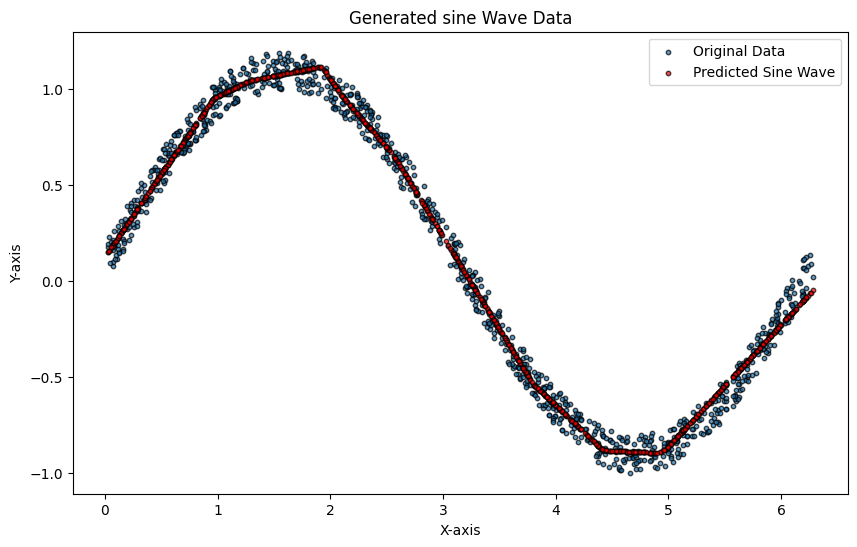

In [8]:
# Get predictions of the model.
predictions = model.predict(x_values)

# Create the plot of the predicted values.
plt.figure(figsize=(10, 6))
plt.title('Generated sine Wave Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Scatter plot of original data
plt.scatter(
    x_values,
    y_values,
    s=10,
    alpha=0.7,
    edgecolors='k',
    label='Original Data'
    )

plt.scatter(
    x_values,
    predictions,
    s=10,
    color='r',
    alpha=0.7,
    edgecolors='k',
    label='Predicted Sine Wave'
)

plt.legend()
plt.show()

Now you can save the model's parametres and using it in embedded devices by generating a generic .c file that contains weights, biases and layers of the model.

In [9]:
ut.ModelConverter.generate_c_code(model, 'model_weights.c')